<a href="https://colab.research.google.com/github/pcsilcan/da/blob/master/07_cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


4


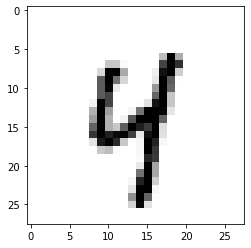

In [0]:
idx = 2222
print(y_train[idx])
plt.imshow(x_train[idx], cmap='Greys')
#print(x_train[idx])

In [0]:
x_train = x_train / 255.
x_test = x_test / 255.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
model = Sequential([
    Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2006 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0810 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0581 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0295 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0258 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0230 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0186 - accuracy: 0.9936
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

[0.06442707777023315, 0.984499990940094]

In [0]:
model.save("mnist_model.h5")